In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [4]:
# import the dataset
df = pd.read_csv("Time_series_analysis_and_forecast_DATASET.csv")

In [5]:
# print the first five records
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [6]:
# print the shape of the dataframe
df.shape

(92016, 5)

In [7]:
# print each column datatypes
df.dtypes

FullDate      object
Tmax         float64
SysLoad      float64
GasPrice     float64
ElecPrice    float64
dtype: object

In [8]:
# Check for missing data
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

# Data Wrangling and Preprocessing

In [10]:
# let convert the FullDate column into a datatime object
df["FullDate"] = pd.to_datetime(df["FullDate"])

In [11]:
# Let print the head of the dataframe
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [12]:
# Let print the datatype in each column again
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

Awesome!!! We have successfully converted the FullDate column into a pandas datetime object.

In [13]:
# Let set the FullDate column as the index
df.set_index("FullDate", inplace=True)

In [14]:
df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [15]:
# Let sample the data by daily
df_daily = df.resample("D").sum()

In [16]:
# Print the shape of the sampled dataframe
df_daily.shape

(3834, 4)

In [18]:
# Let print the head of the sampled dataframe
df_daily.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [19]:
# Let reset the index
df_daily = df_daily.reset_index()

In [20]:
# Let print the head of this dataframe
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [21]:
df_daily.shape

(3834, 5)

In [22]:
# Make a copy of the daily dataframe
df_daily_copy = df_daily.copy()

In [23]:
# Print the shape of the dataframe
df_daily_copy.shape

(3834, 5)

In [24]:
# Print the head of the copied version
df_daily_copy.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


# Splitting the data into training and testing set
Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. 

In [25]:
# Extract the training data
df_train = df_daily[:2757]

In [26]:
# Print the shape
df_train.shape

(2757, 5)

In [27]:
# Make a copy of the training data
df_train_copy = df_train.copy()

In [28]:
# print the shape of the copied version
df_train_copy.shape

(2757, 5)

In [29]:
# Extract test set
df_test = df_daily.iloc[-(len(df_daily)-2757):]

In [30]:
# print the head
df_test.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [31]:
# Print the shape
df_test.shape

(1077, 5)

In [32]:
# Make a copy of the test set
df_test_copy = df_test.copy()

In [33]:
df_test_copy.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [34]:
# Print the shape of the copied version
df_test_copy.shape

(1077, 5)

In [35]:
# Dropping other columns from both the training and test set
df_train.drop(["Tmax", "SysLoad", "GasPrice"], axis=1, inplace=True)
df_test.drop(["Tmax", "SysLoad", "GasPrice"], axis=1, inplace = True)

C:\Users\KAYODE\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df_train.head()

,FullDate,ElecPrice
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [37]:
df_test.head()

,FullDate,ElecPrice
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


In [38]:
# Renaming the columns in both training and test set
df_train.columns = ["ds", "y"]
df_test.columns = ["ds", "y"]

In [39]:
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [40]:
# print the head of the training dataset
df_test.head()

,ds,y
2757,2018-03-20,1833.00
2758,2018-03-21,1730.49
2759,2018-03-22,2260.55
2760,2018-03-23,2138.76
2761,2018-03-24,1721.70


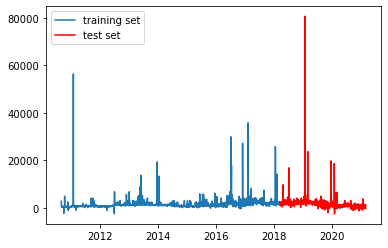

In [41]:
plt.plot(df_train.ds, df_train.y, label = "training set")
plt.plot(df_test.ds, df_test.y, label="test set", color = "red")
plt.legend()
plt.show()

# Univariate Time Forecasting

In [42]:
# Instantiate the model
m = Prophet()

In [43]:
# Train the model
model = m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
forecast = model.predict(df_test)

In [45]:
# Print the forecast Result
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2532.597599,118.609031,5011.113096,2687.559970,2687.559970,2687.559970
1,2018-03-21,2685.904876,199.064519,4985.660442,2688.363580,2688.363580,2688.363580
2,2018-03-22,2784.881631,430.838521,5152.801224,2689.167191,2689.167191,2689.167191
3,2018-03-23,2576.986939,229.673368,4833.972418,2689.970801,2689.970801,2689.970801
4,2018-03-24,2252.177118,-373.067615,4635.526818,2690.774412,2690.774412,2690.774412
...,...,...,...,...,...,...,...
1072,2021-02-24,3459.815189,390.560091,6445.376899,3549.030588,1750.507144,5226.937397
1073,2021-02-25,3526.670387,492.293331,6438.353822,3549.834198,1748.474002,5230.279067
1074,2021-02-26,3293.467992,185.066197,5897.734090,3550.637809,1746.440861,5233.620738
1075,2021-02-27,2950.116564,49.990446,5709.334776,3551.441420,1744.407719,5236.962408


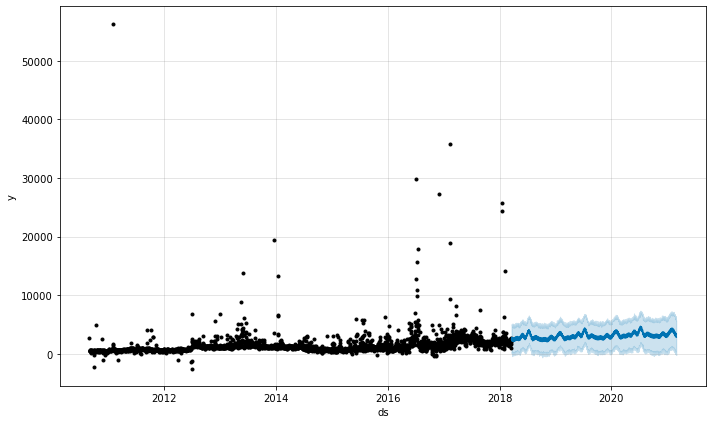

In [48]:
# Visualize the forecast result
plot1 = m.plot(forecast)

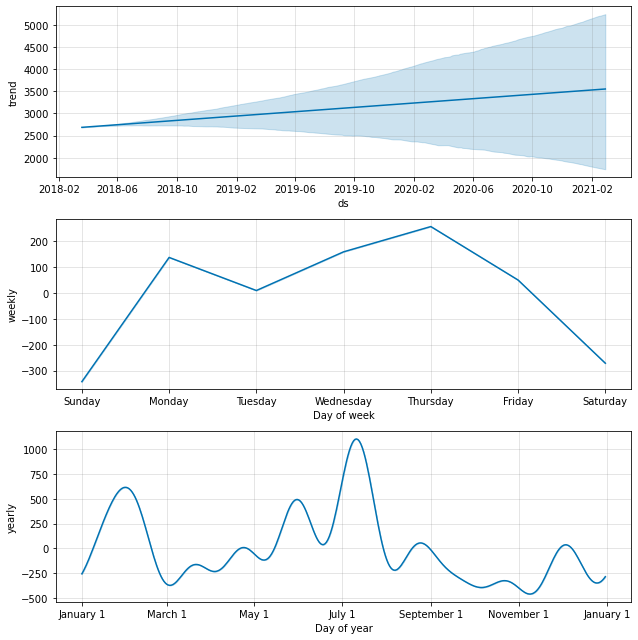

In [49]:
# plot the yearly result
plot2 = m.plot_components(forecast)

In [50]:
# Evaluate the performance of the model
y_actual = df_test.y
y_pred = forecast[-(len(df_daily)-2757):]["yhat"]

In [52]:
mean_absolute_percentage_error(y_actual, y_pred)*100

546.82354876927

In [56]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return round(np.mean(np.abs((actual - pred) / actual)) * 100,2)

In [57]:
actual = y_actual
pred = y_pred

In [61]:
print("MAPE: {}".format(mape(actual, pred)))

MAPE: 546.82


In [64]:
# Calculating the RMSE
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(y_actual, y_pred)),2)
print("RMSE: {}".format(rmse))

RMSE: 3212.28


In [65]:
# Stationarity Check for SysLoad
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_daily["SysLoad"])

In [66]:
# Print the result
print(f'ADF statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used: {adf_result[3]}')
print(f'Critical values: ')
for k, v in adf_result[4].items():
    print(f'  {k}: {v}')

ADF statistic: -3.690158988836651
p-value: 0.00425372550457405
No. of lags used: 30
No. of observations used: 3803
Critical values: 
  1%: -3.432070672988693
  5%: -2.8623002987378547
  10%: -2.567174716967499


In [67]:
# Stationarity Test for GasPrice
from statsmodels.tsa.stattools import adfuller
adf_result1 = adfuller(df_daily["GasPrice"])

In [68]:
#Print the result
print(f'ADF statistic: {adf_result1[0]}')
print(f'p-value: {adf_result1[1]}')
print(f'No. of lags used: {adf_result1[2]}')
print(f'No. of observations used: {adf_result1[3]}')
print(f'Critical values: ')
for k, v in adf_result1[4].items():
    print(f'  {k}: {v}')

ADF statistic: -2.902766697165178
p-value: 0.04502721288462563
No. of lags used: 27
No. of observations used: 3806
Critical values: 
  1%: -3.4320693157877544
  5%: -2.8622996992165364
  10%: -2.5671743978048323


In [69]:
# Stationarity Test for ElecPrice
adf_result2 = adfuller(df_daily["ElecPrice"])

In [70]:
# Print the result
print(f'ADF statistic: {adf_result2[0]}')
print(f'p-value: {adf_result2[1]}')
print(f'No. of lags used: {adf_result2[2]}')
print(f'No. of observations used: {adf_result2[3]}')
print(f'Critical values: ')
for k, v in adf_result2[4].items():
    print(f'  {k}: {v}')

ADF statistic: -8.269053866873824
p-value: 4.848817773711018e-13
No. of lags used: 20
No. of observations used: 3813
Critical values: 
  1%: -3.432066157296446
  5%: -2.8622983040036005
  10%: -2.5671736550459663


# Multivariate Time Series Forecasting

In [71]:
# Prepare the data
df_daily_copy = df_daily_copy.rename(columns={"FullDate":"ds", "ElecPrice":"y"})
df_train_copy = df_train_copy.rename(columns = {"FullDate":"ds", "ElecPrice":"y"})
df_test_copy = df_test_copy.rename(columns = {"FullDate":"ds", "ElecPrice":"y"})

In [72]:
# Print the head of the training set
df_train_copy.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [73]:
# Print the head of the test set
df_test_copy.head()

,ds,Tmax,SysLoad,GasPrice,y
2757,2018-03-20,540.0,7696.91130,201.5880,1833.00
2758,2018-03-21,571.2,4658.05865,203.2560,1730.49
2759,2018-03-22,722.4,19161.78525,203.2560,2260.55
2760,2018-03-23,811.2,18090.43435,198.6456,2138.76
2761,2018-03-24,832.8,3763.53865,180.2160,1721.70


In [74]:
# Instantiate the model
model_new = Prophet()

In [75]:
# Add the regressors
model_new.add_regressor("Tmax")
model_new.add_regressor("SysLoad")
model_new.add_regressor("GasPrice")

In [76]:
# Fit the model
model_new.fit(df_train_copy)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
# Make forecast
forecast_data = model_new.predict(df_test_copy)

In [78]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,1986.827251,-185.307199,4267.039492,1862.391341,1862.391341,1862.391341
1,2018-03-21,1978.327733,-93.399121,4285.361914,1863.080260,1863.080260,1863.080260
2,2018-03-22,2898.217274,836.707201,5117.463596,1863.769179,1863.769179,1863.769179
3,2018-03-23,2582.277128,158.132570,4770.689500,1864.458099,1864.458099,1864.458099
4,2018-03-24,1435.017718,-764.618077,3560.076552,1865.147018,1865.147018,1865.147018
...,...,...,...,...,...,...,...
1072,2021-02-24,954.330522,-1385.678183,3372.888624,2600.912906,1802.453006,3405.748956
1073,2021-02-25,1313.665270,-1135.748970,3786.430497,2601.601825,1802.251779,3406.209312
1074,2021-02-26,1377.351894,-1056.246002,3725.160765,2602.290745,1802.050552,3408.558843
1075,2021-02-27,1032.438969,-1347.440468,3353.350025,2602.979664,1801.849325,3412.028231


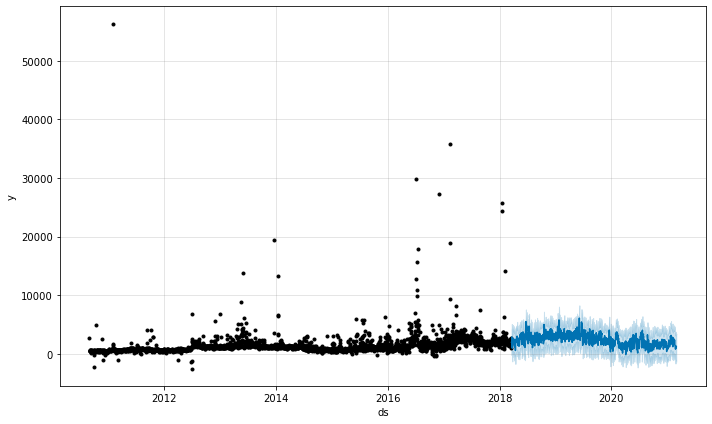

In [79]:
# Visualizing the result
plot3 = model_new.plot(forecast_data)

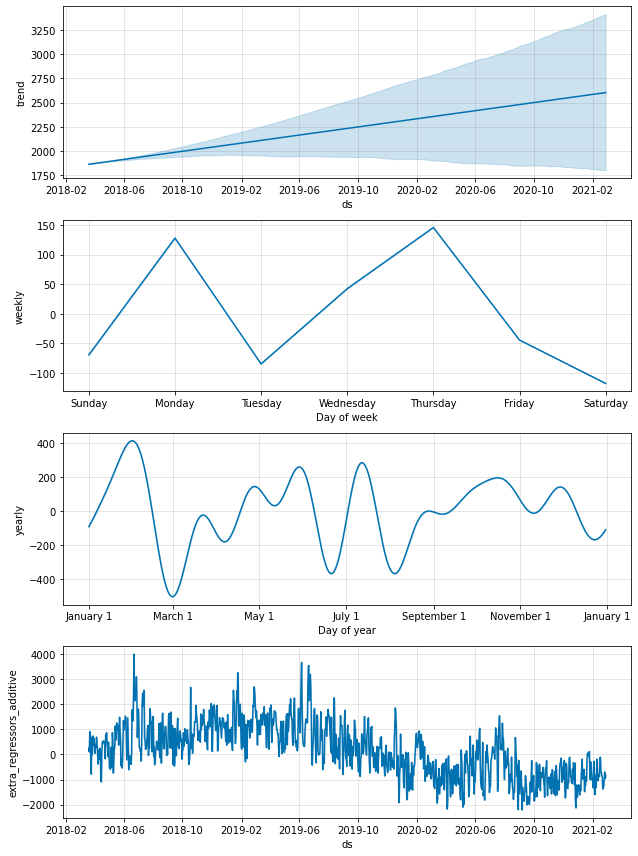

In [81]:
plot4 = model_new.plot_components(forecast_data)

In [82]:
# Evaluate the performance of the model
y_actual_new = df_test_copy.y
y_pred_new = forecast_data[-(len(df_daily)-2757):]["yhat"]

In [85]:
# Calculating the MAPE
print("MAPE: {}".format(mape(y_actual_new, y_pred_new)))

MAPE: 231.6


In [96]:
# Calculating the RMSE
rmse = round((np.sqrt(mean_squared_error(y_actual_new, y_pred_new))),2)

In [97]:
# Print print the RMSE
print("RMSE: {}".format(rmse))

RMSE: 2707.29


# Multivariate Time Series Forecasting (Excluding Tmax feature)

In [98]:
# Instantiate the model
model_new2 = Prophet()

In [99]:
# Add the regressors
model_new2.add_regressor("SysLoad")
model_new2.add_regressor("GasPrice")

In [100]:
# Preprocess the training and test dataset
df_train_copy.drop("Tmax", axis=1, inplace=True)
df_test_copy.drop("Tmax", axis=1, inplace=True)

In [101]:
# Fit the model
model_new2.fit(df_train_copy)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
# Make Prediction
forecast2 = model_new2.predict(df_test_copy)

In [106]:
# Evaluate the model
y_actual_new2 = df_test_copy.y
y_pred_new2 = forecast2[-(len(df_daily)-2757):]["yhat"]

print("MAPE: {}".format(mape(y_actual_new2, y_pred_new2)))

MAPE: 234.25
